# 23/CS/301 Piyush Yadav

## Lab 08– Ensemble Learning
## Learning Outcomes
### By the end of this lab, students will be able to:
- Implement Bagging, Random Forest
- Build sklearn pipeline with preprocessing + classifier
- Evaluate models using accuracy, ROC AUC, and confusion matrix.


### Step 1: Import Libraries

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


### Step 2: Dataset

In [3]:
# Load dataset
df = pd.read_csv("churn.csv")

### Step 3: Preprocessing

In [4]:
# Separate features and target
X = df.drop("Churn", axis=1)
y = df["Churn"].map({'Yes': 1, 'No': 0})  # convert to 0/1

# Identify column types
num_features = X.select_dtypes(include=['int64','float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

# Preprocessing
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

### Step 4: Model Building (Bagging & Random Forest)

In [5]:
# 1️⃣ Split data first
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2️⃣ Define pipelines (Bagging + Random Forest)
bagging_model = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', BaggingClassifier(
        estimator=DecisionTreeClassifier(),
        n_estimators=100,
        random_state=42
    ))
])

rf_model = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=100,
        random_state=42
    ))
])

# 3️⃣ Fit models on training data
bagging_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# 4️⃣ Predict on test data
y_pred_bagging = bagging_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)


### Step 5: Training and Evaluation


📊 --- Bagging Classifier ---
Accuracy:  0.8091
Precision: 0.6912
Recall:    0.5040
F1-Score:  0.5829
ROC-AUC:   0.8436


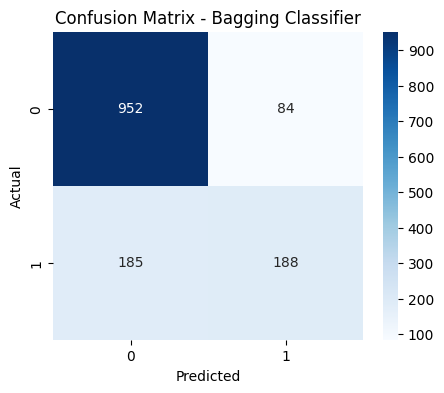

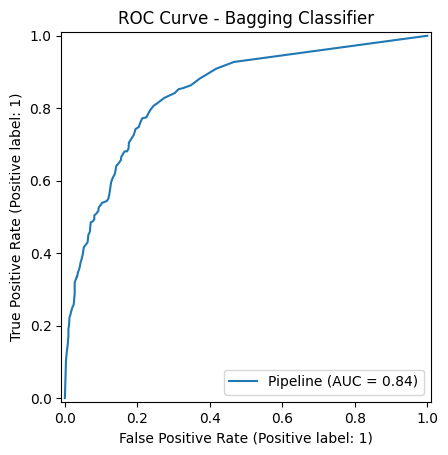


📊 --- Random Forest ---
Accuracy:  0.7956
Precision: 0.6654
Recall:    0.4584
F1-Score:  0.5429
ROC-AUC:   0.8468


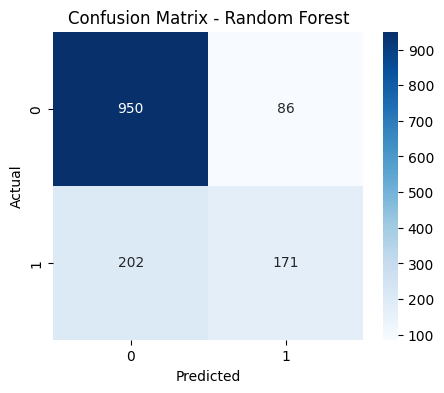

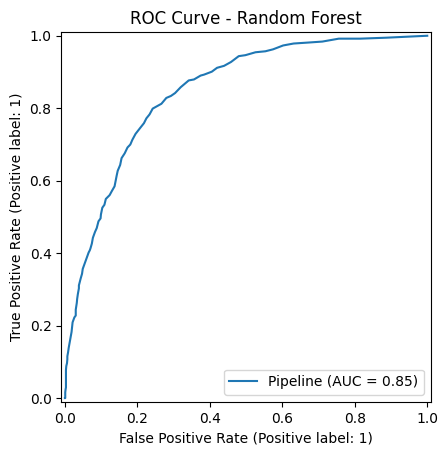

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay
)
import seaborn as sns

models = {
    'Bagging Classifier': bagging_model,
    'Random Forest': rf_model
}

for name, model in models.items():
    # Fit model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    
    print(f"\n📊 --- {name} ---")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    print(f"ROC-AUC:   {roc_auc:.4f}")
    
    # Confusion Matrix Plot
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # ROC Curve Plot
    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.title(f'ROC Curve - {name}')
    plt.show()
